### **Phase 3: Two Approaches for Team Differentiation** 📊

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

(74, 48, 3)
(3552, 3)
[[114 137  50]
 [114 137  50]
 [114 137  50]
 ...
 [113 134  49]
 [112 134  49]
 [112 134  47]]
[82 82 82 ... 83 82 82]


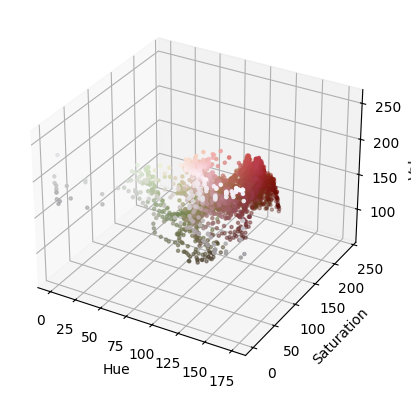

In [6]:
image = cv2.imread('united.png')
print(image.shape)

man = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
pixels = man.reshape((np.shape(man)[0]*np.shape(man)[1], 3))
print(pixels.shape)
print(pixels)

norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixels)
pixels = norm(pixels).tolist()

imagehsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(imagehsv)
hf, sf, vf = h.flatten(), s.flatten(), v.flatten()
print(hf)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.scatter(hf, sf, vf, facecolors=pixels, marker=".")

axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

(58, 52, 3)
(3016, 3)
[[110 137  47]
 [110 137  47]
 [109 136  46]
 ...
 [112 137  52]
 [112 137  52]
 [112 137  52]]
[81 81 81 ... 81 81 81]


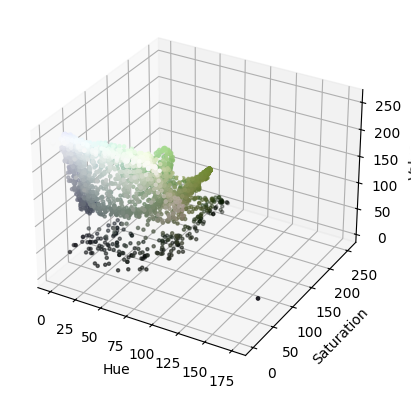

In [7]:
image_li = cv2.imread('liv.png')
print(image_li.shape)

li = cv2.cvtColor(image_li, cv2.COLOR_BGR2RGB)  
pixels = li.reshape((np.shape(li)[0]*np.shape(li)[1], 3))
print(pixels.shape)
print(pixels)

norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixels)
pixels = norm(pixels).tolist()

imagehsv_li = cv2.cvtColor(image_li, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(imagehsv_li)
hf, sf, vf = h.flatten(), s.flatten(), v.flatten()
print(hf)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')
axis.scatter(hf, sf, vf, facecolors=pixels, marker=".")

axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [8]:
bounderies_liverpool = [[17, 0, 138], [122, 113, 255] ]
bounderies_united = [[0, 100, 0], [8, 255, 255] ]

lower_liverpool = np.array(bounderies_liverpool[0], dtype = "uint8")
upper_liverpool = np.array(bounderies_liverpool[1], dtype = "uint8")

lower_united = np.array(bounderies_united[0], dtype = "uint8")
upper_united = np.array(bounderies_united[1], dtype = "uint8")

mask_liverpool = cv2.inRange(imagehsv_li, lower_liverpool, upper_liverpool)
mask_united = cv2.inRange(imagehsv, lower_united, upper_united)

cv2.imshow("Mask Liverpool", mask_liverpool)
cv2.waitKey(0)

2025-02-06 12:11:33.641 python[10299:328580] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 12:11:33.641 python[10299:328580] +[IMKInputSession subclass]: chose IMKInputSession_Modern


13

In [11]:
mask_united = cv2.bitwise_and(image, imagehsv, mask = mask_united)
masked_bgr_united = cv2.cvtColor(mask_united, cv2.COLOR_HSV2BGR)
cv2.imshow("Masked Liverpool", masked_bgr_united)
cv2.waitKey(0)

13

In [9]:
mask_liverpool = cv2.bitwise_and(image_li, imagehsv_li, mask = mask_liverpool)
masked_bgr_liverpool = cv2.cvtColor(mask_liverpool, cv2.COLOR_HSV2BGR)
cv2.imshow("Masked Liverpool", masked_bgr_liverpool)
cv2.waitKey(0)

13